In [1]:
import numpy as np
import pylab as plt
import matplotlib as mpl
import tifffile as tiff
from sklearn.cluster import KMeans
from Smoother import GaussSmootherBuilder
import os

%load_ext autoreload
%autoreload 2

In [2]:
cmap = mpl.cm.get_cmap('rainbow', 5)

In [3]:
dir_path = './data'
filenames = os.listdir(dir_path)

In [55]:
data = tiff.imread(os.path.join(dir_path, filenames[0]))

In [8]:
%matplotlib inline

<IPython.core.display.Javascript object>


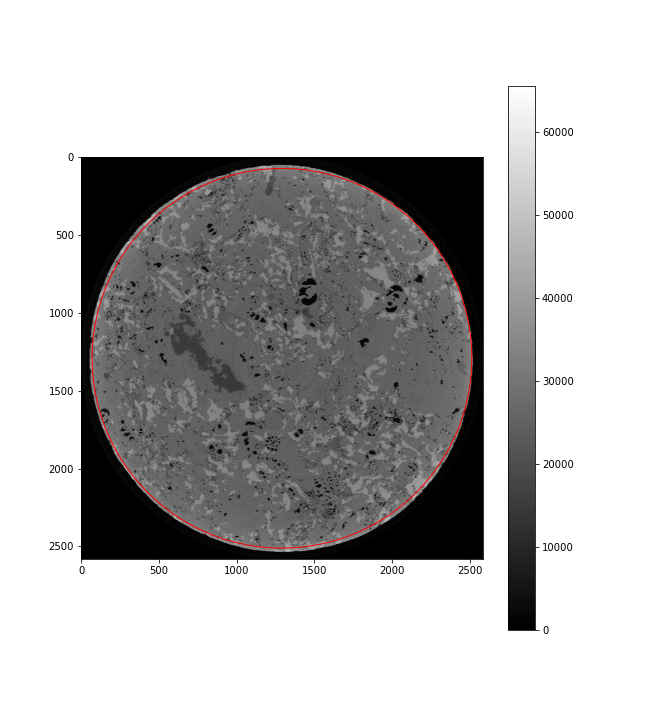

In [56]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 10))
im = plt.imshow(data, aspect='auto', cmap='gray')
plt.colorbar(im)
Drawing_uncolored_circle = plt.Circle( (1291, 1291 ),
                                      1220,
                                      fill=False,
                                      color='r')
axs.set_aspect( 1 )
axs.add_artist( Drawing_uncolored_circle )

In [47]:
y,x = np.ogrid[-1291: 1291, -1291: 1291]
mask = x**2+y**2 <= 1210**2

In [48]:
mask.shape

(2582, 2582)

In [57]:
data_nan = np.zeros_like(data, dtype=float)
data_nan[mask] = data[mask]
data_nan[~mask] = np.nan

In [58]:
mask.shape

(2582, 2582)

In [59]:
%matplotlib notebook

<IPython.core.display.Javascript object>


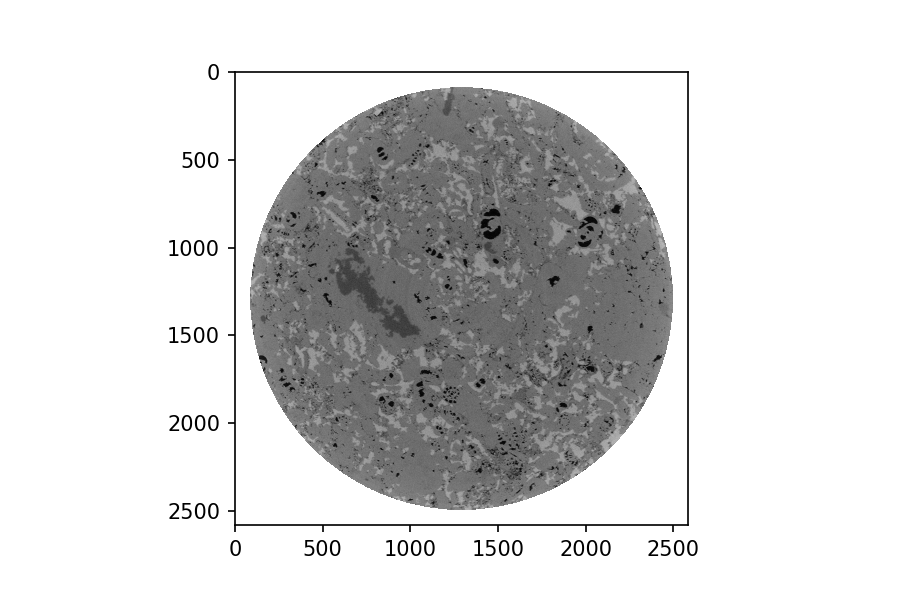

In [60]:
fig = plt.figure(dpi=150)
plt.imshow(data_nan, cmap='gray')

In [6]:
# mask = data == 0
# nan_data = np.zeros_like(data, dtype=float)
# nan_data[mask] = np.nan
# nan_data[~mask] = data[~mask]

(array([1.869431e+06, 9.185700e+04, 5.521100e+04, 4.549000e+04,
        6.247100e+04, 1.103640e+05, 2.149430e+05, 3.988940e+05,
        6.237830e+05, 7.797630e+05, 7.698300e+05, 6.217690e+05,
        4.353770e+05, 2.787590e+05, 1.617490e+05, 8.359400e+04,
        3.843400e+04, 1.574600e+04, 6.000000e+03, 2.085000e+03,
        7.250000e+02, 2.850000e+02, 1.050000e+02, 3.900000e+01,
        2.000000e+01]),
 array([    0. ,  2621.4,  5242.8,  7864.2, 10485.6, 13107. , 15728.4,
        18349.8, 20971.2, 23592.6, 26214. , 28835.4, 31456.8, 34078.2,
        36699.6, 39321. , 41942.4, 44563.8, 47185.2, 49806.6, 52428. ,
        55049.4, 57670.8, 60292.2, 62913.6, 65535. ]),
 <BarContainer object of 25 artists>)

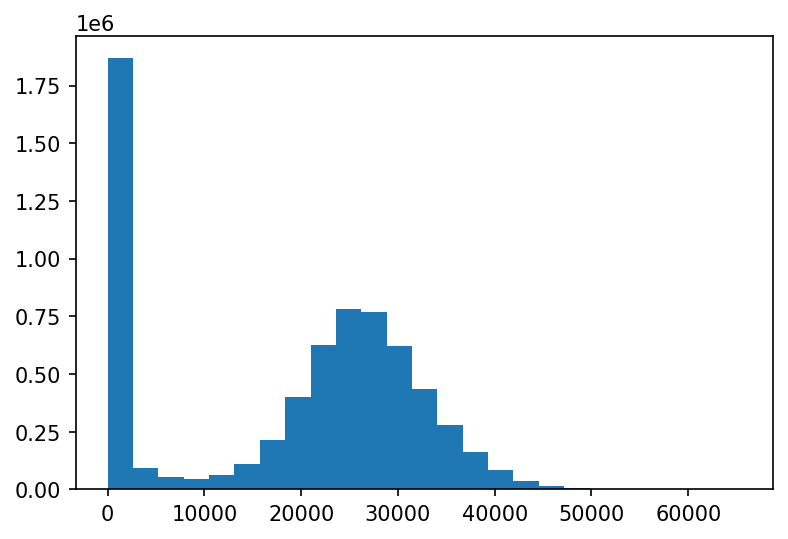

In [7]:
fig = plt.figure(dpi=150)
plt.hist(data.ravel(), bins=25)

# Кластеризация втупую

In [55]:
norm = np.max(abs(data))
norm_data = data.astype('float32') / norm
reshaped_data = norm_data.reshape((norm_data.shape[0]*norm_data.shape[1], 1))

In [56]:
reshaped_data.shape

(6666724, 1)

In [57]:
kmeans_0 = KMeans(n_clusters=5,).fit(reshaped_data)

In [58]:
kmeans_0.labels_.shape

(6666724,)

In [61]:
result = kmeans_0.labels_.reshape(norm_data.shape)

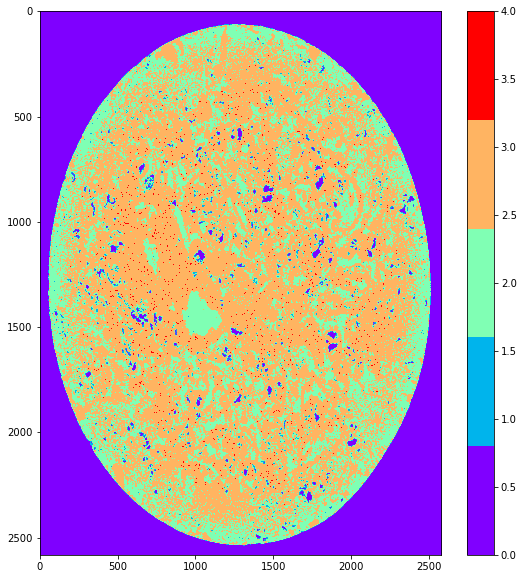

In [68]:
fig = plt.figure(figsize=(9, 10))
im = plt.imshow(result, aspect='auto', cmap=cmap)
plt.colorbar(im)

In [71]:
%matplotlib notebook

<IPython.core.display.Javascript object>


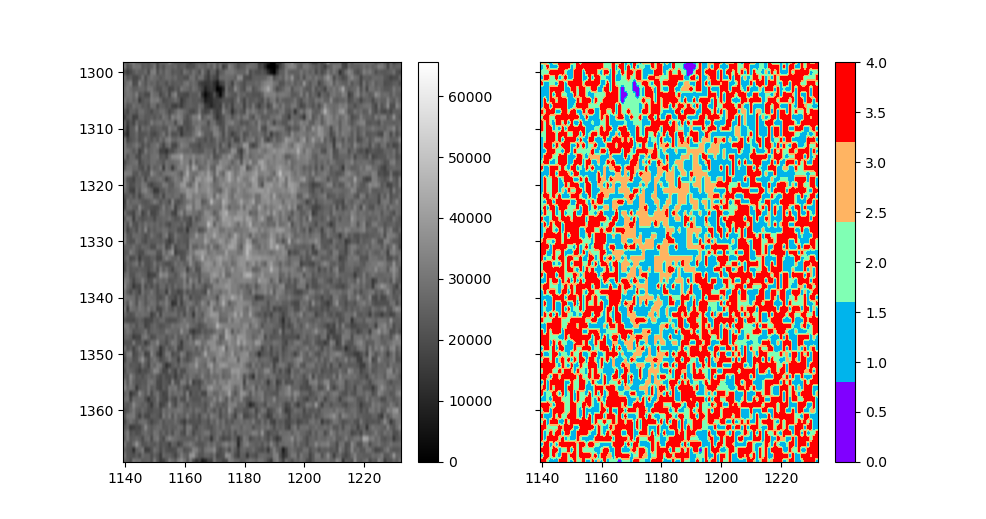

In [74]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharex=True, sharey=True)

im = axs[0].imshow(data, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[0])

im = axs[1].imshow(result, aspect='auto', cmap=cmap)
plt.colorbar(im, ax=axs[1])

In [77]:
cut_data = data[1300: 1380, 1140:1240]


In [79]:
%matplotlib inline

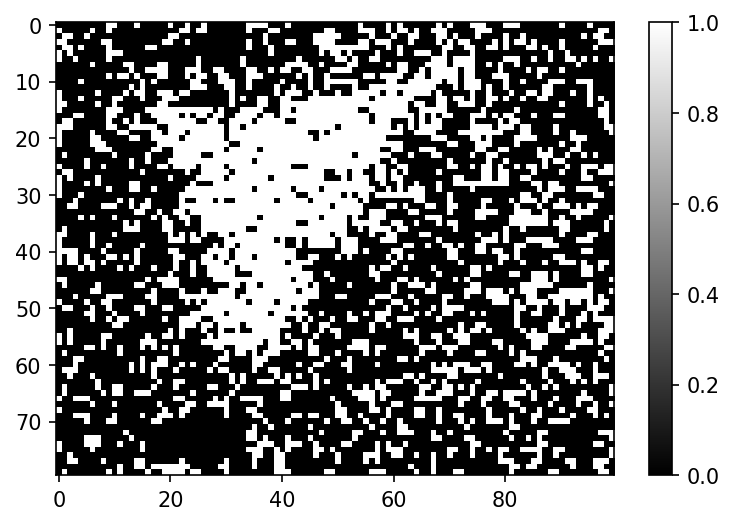

In [93]:
fig = plt.figure(dpi=150)
im = plt.imshow(
#     (cut_data < 35000)*(cut_data > 15000),
    cut_data > 28000,
                aspect='auto',
    cmap='gray')
plt.colorbar(im)

# Сглаживание

# Gaussian 

In [6]:
gaussian_builder = GaussSmootherBuilder()
gaussian_filter = gaussian_builder.create_smoother(kernel_size=10)

In [7]:
filt_data = gaussian_filter.smooth_data(data)

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


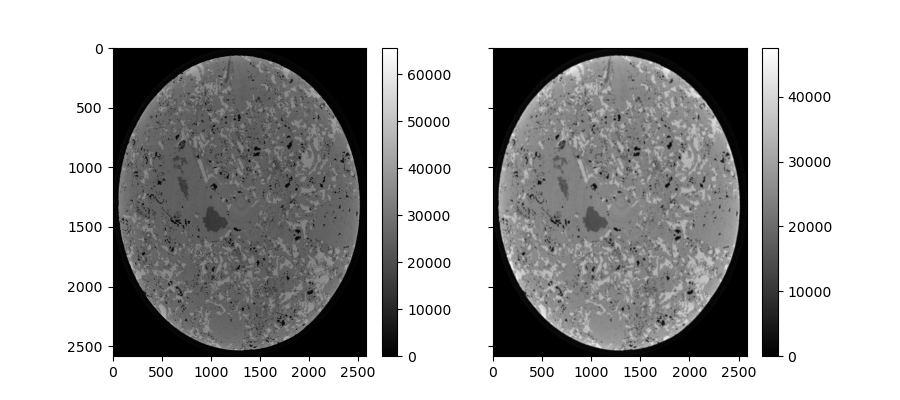

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharex=True, sharey=True)

im = axs[0].imshow(data, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[0])

im = axs[1].imshow(filt_data, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[1])

# Median

In [12]:
from scipy import signal

In [22]:
filt_data = signal.medfilt2d(data, kernel_size=15)

<IPython.core.display.Javascript object>


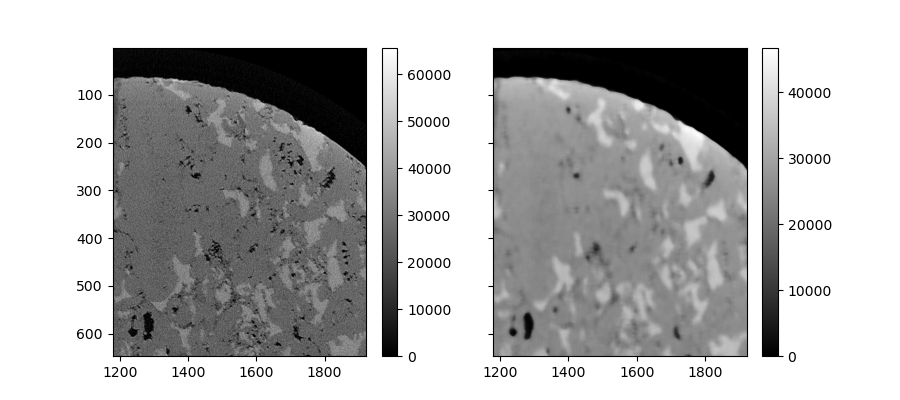

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharex=True, sharey=True)

im = axs[0].imshow(data, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[0])

im = axs[1].imshow(filt_data, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[1])

In [10]:
def prepare_data(my_data):
    my_mask = my_data == 0
    norm = np.max(abs(my_data))
    norm_data = my_data.astype('float32') / norm
    reshaped_data = norm_data[~my_mask]
    reshaped_data = reshaped_data.reshape(reshaped_data.shape+(1,))
    return my_mask, reshaped_data

In [11]:
mask, prepared_data = prepare_data(filt_data)

In [12]:
prepared_data.shape

(5284489, 1)

In [14]:
kmeans_0 = KMeans(n_clusters=5,).fit(prepared_data)

In [16]:
labels = kmeans_0.labels_ + 1

In [17]:
result = np.zeros(data.shape, dtype='float')
result[~mask] = labels

<IPython.core.display.Javascript object>


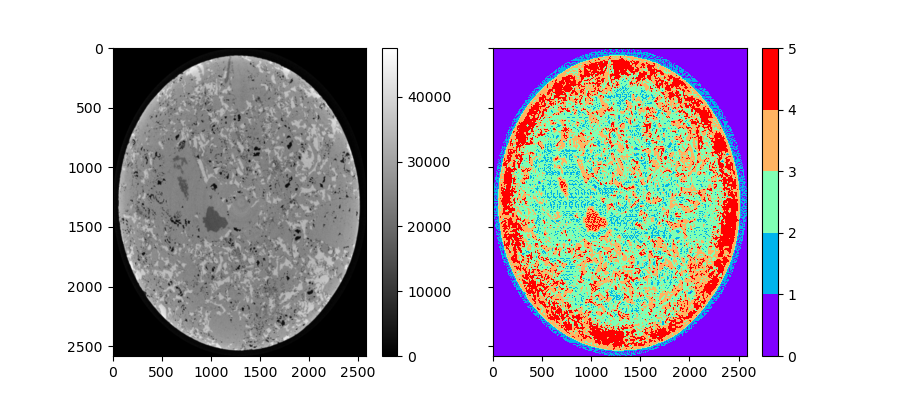

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharex=True, sharey=True)

im = axs[0].imshow(filt_data, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[0])

im = axs[1].imshow(result, aspect='auto', cmap=cmap)
plt.colorbar(im, ax=axs[1])

In [57]:
a = [0, 1, 2, 3]
b = [4, 5, 6, 7]

c = zip(a, b)


In [58]:
list(c)

[(0, 4), (1, 5), (2, 6), (3, 7)]

In [55]:
list(zip(*c))

[]